# K-Means Clustering

Çok sayıdaki ham veriyi gruplara ayırmak için kullanılır.
Ham veriler hakkında önceden sınıflandırma yapmamız gerekmektedir.

K-Means, gözetimsiz öğrenme (unsupervised learning) algoritmalarından biridir ve özellikle kümeleme (clustering) işlemlerinde yaygın olarak kullanılır. Veriyi K farklı gruba ayırarak benzer özelliklere sahip verileri aynı kümede toplamayı amaçlar.

## K-Means Algoritmasının Çalışma Prensibi
Başlangıç Küme Merkezlerini (Centroids) Belirleme:

Küme sayısı K belirlenir.

Rastgele K tane başlangıç merkezi (centroid) seçilir.


Her Noktanın En Yakın Küme Merkezine Atanması:

Her veri noktası, kendisine en yakın olan küme merkezine atanır.

Bunun için genellikle Öklid Mesafesi (Euclidean Distance) kullanılır.


Küme Merkezlerini Güncelleme:

Küme merkezleri, küme içindeki noktaların ortalaması alınarak güncellenir.


Adımları Tekrarlama:

Veri noktalarının kümeleri değişmediği ya da küme merkezleri sabit kalana kadar adımlar tekrar edilir.


✅ Avantajları

✔ Basit ve hızlı bir algoritmadır.

✔ Büyük veri kümelerinde verimli çalışır.

✔ Çoğu kümeleme problemlerinde başarılıdır.


❌ Dezavantajları

✖ K değeri önceden belirlenmelidir (yanlış K seçimi kötü sonuçlara yol açabilir).

✖ Başlangıç küme merkezleri rastgele seçildiğinden farklı sonuçlar üretebilir.

✖ Ölçeklendirilmemiş verilerde kötü performans gösterebilir (Öncesinde ölçeklendirme yapılmalıdır).
K-Means, gözetimsiz öğrenme yöntemlerinden en popüler olanlarından biridir. Doğru K değerini belirleyerek ve veriyi uygun şekilde ölçeklendirerek etkili sonuçlar alınaiblir.

!!! K değerini belirlerken elbow metodu kullanılır. K değerleri distortion değerleri ile birlikte grafiğe döktünüzde dirsek noktasında bulunan K değeri en optimal K değeri olarak kabul edilir.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df=pd.read_csv("Avm_Musterileri.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


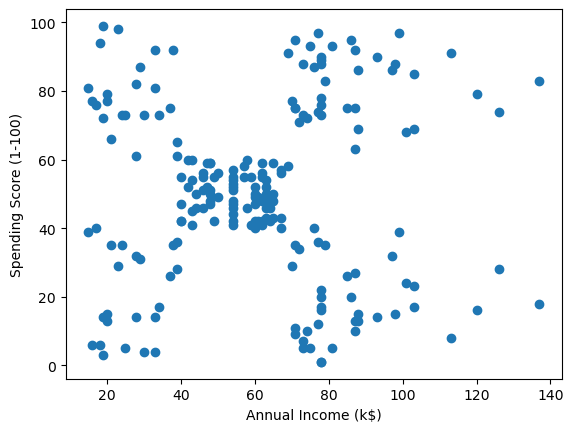

In [2]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [3]:
df.rename(columns={"Annual Income (k$)":"income"},inplace=True)
df.rename(columns={"Spending Score (1-100)":"score"},inplace=True)

In [4]:
scaller=MinMaxScaler()
scaller.fit(df[["income"]])
df["income"]=scaller.transform(df[["income"]])

scaller.fit(df[["score"]])
df["score"]=scaller.transform(df[["score"]])
df.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


Elbow yöntemi kullanılarak K değerini belirleyelim.

In [5]:
k_range=range(1,11)

list_dist=[]

for k in k_range:
    kmeans_model=KMeans(n_clusters=k, n_init="auto")
    kmeans_model.fit(df[["income","score"]])
    list_dist.append(kmeans_model.inertia_)

Windows’ta K-Means bellek sızıntısı sorununu kalıcı olarak çözmek için ortam değişkenlerini ayarlayabilirsin. Bunun için **Başlat menüsüne** “Edit the system environment variables” yazarak açılan pencereye gir. **"Advanced" (Gelişmiş) sekmesine** git ve **"Environment Variables..." (Ortam Değişkenleri...)** butonuna tıkla. Açılan pencerede **"System Variables" (Sistem Değişkenleri)** bölümüne gel ve **"New..." (Yeni...)** butonuna bas. Değişken adı kısmına **`OMP_NUM_THREADS`**, değişken değeri kısmına ise **`1`** yaz ve **OK** butonuna basarak değişikliği kaydet. Tüm pencereleri kapattıktan sonra bilgisayarını yeniden başlat. Değişikliğin başarıyla uygulandığını kontrol etmek için **Komut İstemi (CMD)** aç ve şu komutu çalıştır: `echo %OMP_NUM_THREADS%`. Eğer çıktı olarak `1` görüyorsan işlem başarıyla tamamlanmıştır. Bilgisayarını yeniden başlatmayı unutma

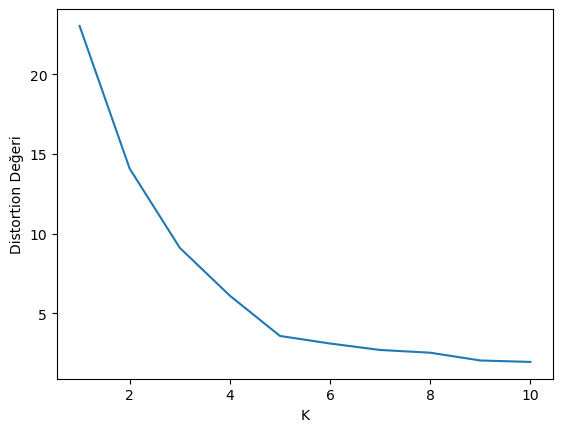

In [7]:
plt.xlabel("K")
plt.ylabel("Distortion Değeri")
plt.plot(k_range,list_dist)
plt.savefig("ElbowDirsekNoktası.png",dpi=300)
plt.show()

In [9]:
# en uygun K değeri 5.
kmeans_model=KMeans(n_clusters=5)
y_predicted=kmeans_model.fit_predict(df[["income","score"]])
y_predicted

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [10]:
df["cluster"]=y_predicted
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,4
1,2,0.000000,0.816327,3
2,3,0.008197,0.051020,4
3,4,0.008197,0.775510,3
4,5,0.016393,0.397959,4


In [11]:
kmeans_model.cluster_centers_

array([[0.32866853, 0.49340468],
       [0.6       , 0.16443149],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894],
       [0.08792846, 0.19619666]])

ValueError: x and y must be the same size

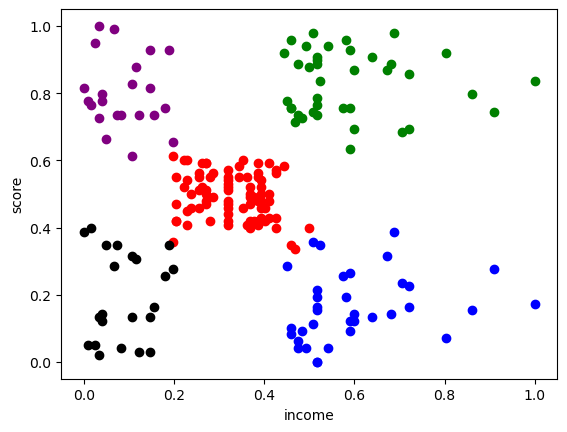

In [14]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

plt.xlabel("income")
plt.ylabel("score")

plt.scatter(df1["income"], df1["score"],color="red")
plt.scatter(df2["income"], df2["score"],color="blue")
plt.scatter(df3["income"], df3["score"],color="green")
plt.scatter(df4["income"], df4["score"],color="purple")
plt.scatter(df5["income"], df5["score"],color="black")

plt.scatter(kmeans_model.cluster_centers_[:0],kmeans_model.cluster_centers_[:1],color="orange",marker="*")
plt.legend()
plt.show()